In [25]:
import http
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import time
from time import sleep
import datetime
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Merging 3 csv files

In [27]:
df_213=pd.read_csv("newYorkBooking21.3.csv")
df_173=pd.read_csv("newYorkBooking17.3.csv")
df_193=pd.read_csv("newYorkBooking19.3.csv")
df = pd.concat([df_173, df_213 ,df_193], ignore_index=True)

In [28]:
df

,check-in,check-out,TTT,LOS,Hotel Name,Price,Reviews,NumberOfNights,Locatins,Score,Score_in_the_description,priceBeforesale,Cancellation,prepayment,typeBed,DistanceFromCenter,Subway Access,Stars
0,2023-03-17,2023-03-18,1,1,Pestana Park Avenue,913,821,1,Murray Hill,8.5,Very Good,"1,521",Not Free,Yes,Classic Room - Disability Access,1.9 km,Subway Access,4
1,2023-03-17,2023-03-18,1,1,The Cloud One New York-Downtown,766,571,1,Wall Street - Financial District,8.3,Very Good,NaN,Not Free,Yes,Standard King Room,7 km,Subway Access,4
2,2023-03-17,2023-03-18,1,1,TownePlace Suites by Marriott New York Manhatt...,"1,023","2,408",1,Chelsea,8.1,Very Good,NaN,Not Free,Yes,King Studio with Kitchenette,2.5 km,Subway Access,4
3,2023-03-17,2023-03-18,1,1,Pod Times Square,913,"12,852",1,Hell's Kitchen,8.1,Very Good,NaN,Not Free,Yes,Bunk Pod,1.4 km,Subway Access,4
4,2023-03-17,2023-03-18,1,1,Hampton Inn Manhattan Times Square North,"1,133","2,669",1,Hell's Kitchen,7.8,Good,NaN,Not Free,Yes,Queen Room,0.6 km,Subway Access,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49735,17/04/2023,21/04/2023,30,5,"The Langham, New York, Fifth Avenue","17,609",250,5,Manhattan,9.1,Wonderful,NaN,FREE,No,Superior Room with King Bed,2 km,Subway Access,5
49736,17/04/2023,21/04/2023,30,5,Off SoHo Suites Hotel,"8,433",369,5,Lower East Side,8.0,Very Good,NaN,FREE,No,Deluxe One-Bedroom Suite,5.3 km,Subway Access,2
49737,17/04/2023,21/04/2023,30,5,"voco Times Square South, an IHG Hotel","5,221","1,439",5,Hell's Kitchen,7.7,Good,NaN,FREE,No,Standard King Room - Non-Smoking,1.8 km,Subway Access,4
49738,17/04/2023,21/04/2023,30,5,Cambria Hotel New York - Chelsea,"5,514","2,572",5,Chelsea,8.0,Very Good,NaN,Not Free,Yes,King Room - Disability Access,2.5 km,Subway Access,4


Adding a Index column to our data frame that represent the position on the page

In [30]:

i_list = []
j=1
for i in range(1, len(df)):
    i_list.append(j)
    j=j+1
    # compare the current value with the previous value
    if (df['LOS'][i] != df['LOS'][i-1]):
        j=1
df['Index']= pd.Series(i_list)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49740 entries, 0 to 49739
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   check-in                  49740 non-null  object 
 1   check-out                 49740 non-null  object 
 2   TTT                       49740 non-null  int64  
 3   LOS                       49740 non-null  int64  
 4   Hotel Name                49740 non-null  object 
 5   Price                     49740 non-null  object 
 6   Reviews                   49740 non-null  object 
 7   NumberOfNights            49740 non-null  int64  
 8   Locatins                  49740 non-null  object 
 9   Score                     49740 non-null  float64
 10  Score_in_the_description  49430 non-null  object 
 11  priceBeforesale           11463 non-null  object 
 12  Cancellation              49740 non-null  object 
 13  prepayment                49740 non-null  object 
 14  typeBe

In [32]:
df.isna().sum()

check-in                        0
check-out                       0
TTT                             0
LOS                             0
Hotel Name                      0
Price                           0
Reviews                         0
NumberOfNights                  0
Locatins                        0
Score                           0
Score_in_the_description      310
priceBeforesale             38277
Cancellation                    0
prepayment                      0
typeBed                         0
DistanceFromCenter              0
Subway Access                2831
Stars                           0
Index                           1
dtype: int64

 Data preprocessing

In [33]:

df= df[df['NumberOfNights'] != 0] 


df= df[df['DistanceFromCenter'] != 0]
df= df[df['DistanceFromCenter'] != 'Error']

df['Score'] = df["Score"].astype('float')

# convert the date column to datetime
df['check-in']= pd.to_datetime(df['check-in'])
df['check-out']= pd.to_datetime(df['check-out'])

# extract the day of the week from the date column
df['day_of_week_chek_in'] = df['check-in'].dt.weekday + 1
df['day_of_week_chek_out'] = df['check-out'].dt.weekday + 1

df["Reviews"] = df["Reviews"].str.replace(',','')
df["Reviews"] = df["Reviews"].astype('int64')

df["Price"] = df["Price"].str.replace(',','')
df['Price'] = df['Price'].replace("Error", 0)
df['Price'] = df['Price'].astype('int')
df= df[df['Price'] != 0]

df['Cancellation']=df['Cancellation'].str.upper()

df["Stars"] = df["Stars"].replace("Error", 0)
df["Stars"] = df["Stars"].astype('int64')

Oridinal_Review_score = {'Review score' :2,'Good': 1, 'Very Good': 2, 'Excellent': 3 , 'Wonderful':4 , 'Exceptional':5,'Exceptional 10' :6}
df['Score_in_the_description'] = df['Score_in_the_description'].replace(Oridinal_Review_score)

df['Price']= df['Price']*(0.28)

C:\Users\amitb\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/03/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\amitb\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/03/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\amitb\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '28/03/2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\amitb\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '29/03/2023' in DD/MM/YYYY format. Provide format or specif

In [34]:
df = pd.get_dummies(df, columns=['Locatins'])
df['prepayment'].replace({'No':0,'Yes':1},inplace=True)
df['Cancellation'].replace({'NOT FREE':0,'FREE':1},inplace=True)
df['Subway Access'].replace({'':0,'Subway Access':1},inplace=True)

Function that arranges the types of beds according to order ratio

In [35]:

def extract_room_type(text):
    if 'King' in text:
        return 'King'
    elif 'Queen' in text:
        return 'Queen'
    elif 'Double' in text:
        return 'Double'
    elif 'Bunk Pod' in text:
        return 'Bunk Pod'
    elif 'Bunk Bed' in text:
        return 'Bunk Bed'
    elif 'Petite' in text:
        return 'Petite'
    elif 'Single' in text:
        return 'Single'
    elif 'Standard' in text:
        return 'Standard'
    elif 'Deluxe' in text:
        return 'Deluxe'
    elif 'Premier' in text:
        return 'Premier'
    else:
        return 'Unknown'
    
df['typeBed'] = df['typeBed'].apply(extract_room_type)
typeBed_map = {'Unknown':0, 'Bunk Pod':1, 'Bunk Bed':2, 'Petite':3, 'Single':4, 'Standard':5, 'Double':6, 'Queen':7, 'King':8, 'Deluxe':9, 'Premier':10}
df['typeBed'] = df['typeBed'].map(typeBed_map)

Function that convert the distance from km and meter to meter

In [36]:
def convert_distance(val):
    if isinstance(val, str) and 'km' in val:
        val = float(val.replace('km', '').strip()) * 1000
    elif isinstance(val, str) and 'm' in val:
        val = float(val.replace('m', '').strip())
    return int(val)

df['DistanceFromCenter'] = df['DistanceFromCenter'].apply(convert_distance)

In [37]:
df = df.dropna(subset='Score_in_the_description')
df = df.dropna(subset='Index')

In [39]:
df2=df.drop(['NumberOfNights' , 'check-in' ,'check-out','priceBeforesale','Subway Access','Cancellation', 'Score_in_the_description',],axis = 1)

Create graphs of distributions of: the number of reviews, the score, the prices

C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amitb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

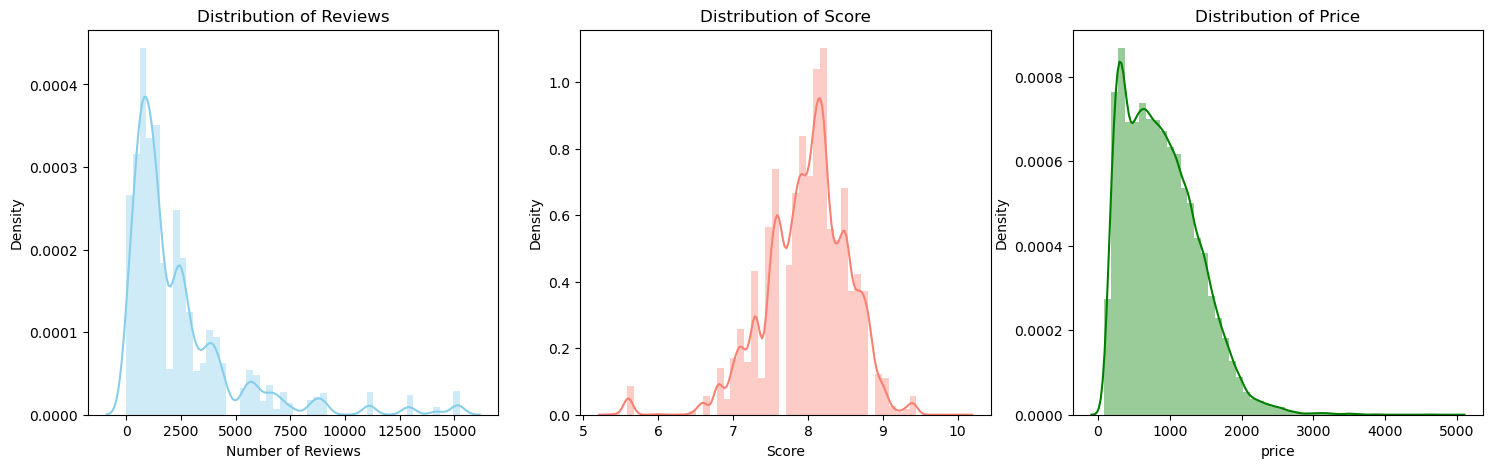

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
sns.distplot(df2['Reviews'], ax=ax1, color='skyblue')
ax1.set_title('Distribution of Reviews')
ax1.set_xlabel('Number of Reviews')
ax1.set_ylabel('Density')
sns.distplot(df2['Score'], ax=ax2, color='salmon')
ax2.set_title('Distribution of Score')
ax2.set_xlabel('Score')
ax2.set_ylabel('Density')
sns.distplot(df2['Price'], ax=ax3, color='green')
ax3.set_title('Distribution of Price')
ax3.set_xlabel('price')
ax3.set_ylabel('Density')
plt.show()

We removed from the data hotels that, according to the price, constitute an outlier according to the Tukey method (5IQR.1)

In [41]:
Q1 = df2['Price'].quantile(0.25)
Q3 = df2['Price'].quantile(0.75)
IQR = Q3-Q1
df2= df2.loc[df2['Price']> (Q1 - (1.5*IQR))]
df2= df2.loc[df2['Price']< (Q3 + (1.5*IQR))]

Statistics

In [42]:
df2[['TTT','LOS', 'Hotel Name', 'Price', 'Reviews',
       'Score',
       'prepayment', 'typeBed',
       'DistanceFromCenter', 'Stars', 'Index',
       'day_of_week_chek_in', 'day_of_week_chek_out']].describe().T

,count,mean,std,min,25%,50%,75%,max
TTT,48978.0,15.467516,8.643534,1.00,8.00,16.00,23.00,30.00
LOS,48978.0,2.987117,1.418170,1.00,2.00,3.00,4.00,5.00
Price,48978.0,869.675021,480.420622,83.72,467.04,816.48,1207.64,2341.36
Reviews,48978.0,2405.669076,2624.493696,1.00,762.00,1455.00,2934.00,15259.00
Score,48978.0,7.982704,0.551454,5.40,7.60,8.00,8.30,10.00
prepayment,48978.0,0.470538,0.499136,0.00,0.00,0.00,1.00,1.00
typeBed,48978.0,6.957348,1.959739,0.00,7.00,8.00,8.00,10.00
DistanceFromCenter,48978.0,2625.484912,2036.896025,100.00,1400.00,1900.00,2900.00,8800.00
Stars,48978.0,3.833701,0.660651,0.00,4.00,4.00,4.00,5.00
Index,48978.0,58.167340,35.293793,1.00,28.00,57.00,85.00,140.00


Correlation between the attrubutes:
* The length of stay is the most correlated attrubute that effect on the price

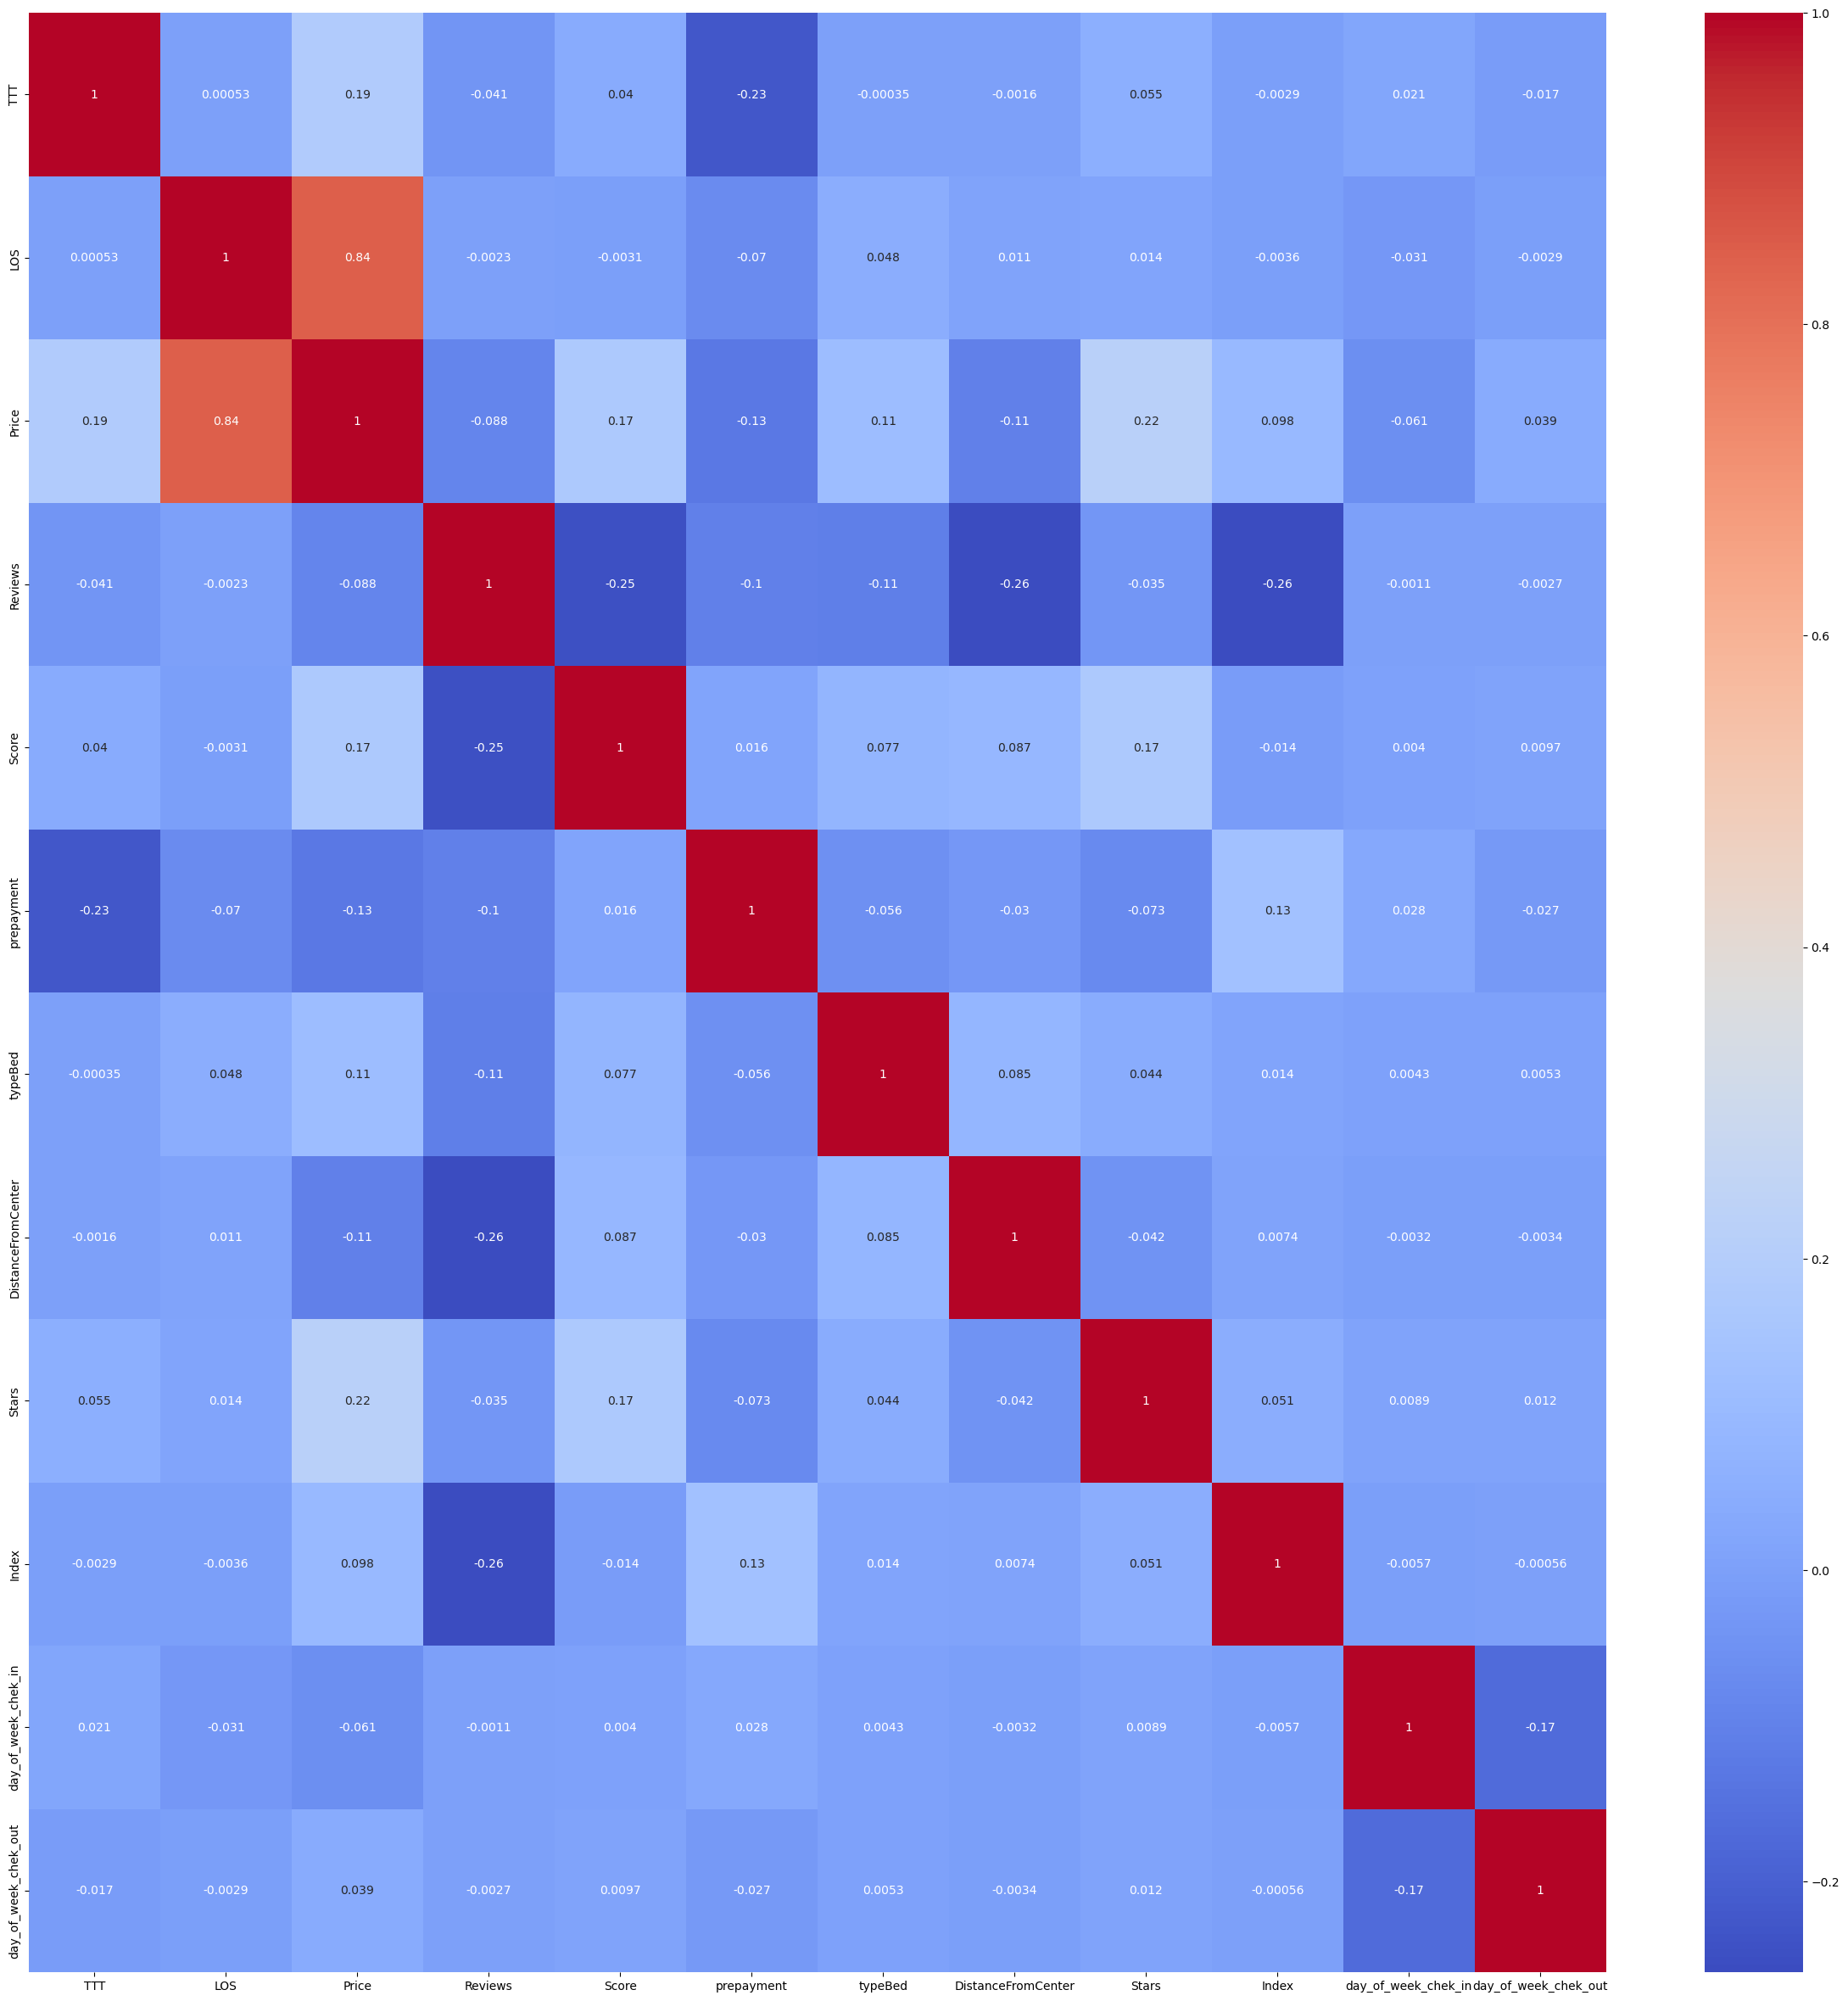

In [43]:
corr = df2[['TTT','LOS', 'Hotel Name', 'Price', 'Reviews',
       'Score',
       'prepayment', 'typeBed',
       'DistanceFromCenter', 'Stars', 'Index',
       'day_of_week_chek_in', 'day_of_week_chek_out']].corr()
fig, ax = plt.subplots(figsize=(30, 30))

sns.heatmap(corr, cmap='coolwarm', annot = True ,ax =ax );


PairGrid:
* creation of a grid of subplots, each displaying a pairwise relationship between two variables in a dataset.
* The PairGrid function takes in a DataFrame as input, and allows for customization of the visualization through various parameters such as the type of plot to display, the variables to display on the x and y-axes, and the style and color of the plot elements.

* In particular, the PairGrid function is useful for exploring relationships between multiple variables in a dataset and identifying patterns and trends between them. It can also be used to identify outliers and data points that may be influential in a regression analysis.

Overall, the PairGrid function is a powerful tool for data exploration and visualization that can help researchers and data analysts gain insights into complex datasets.



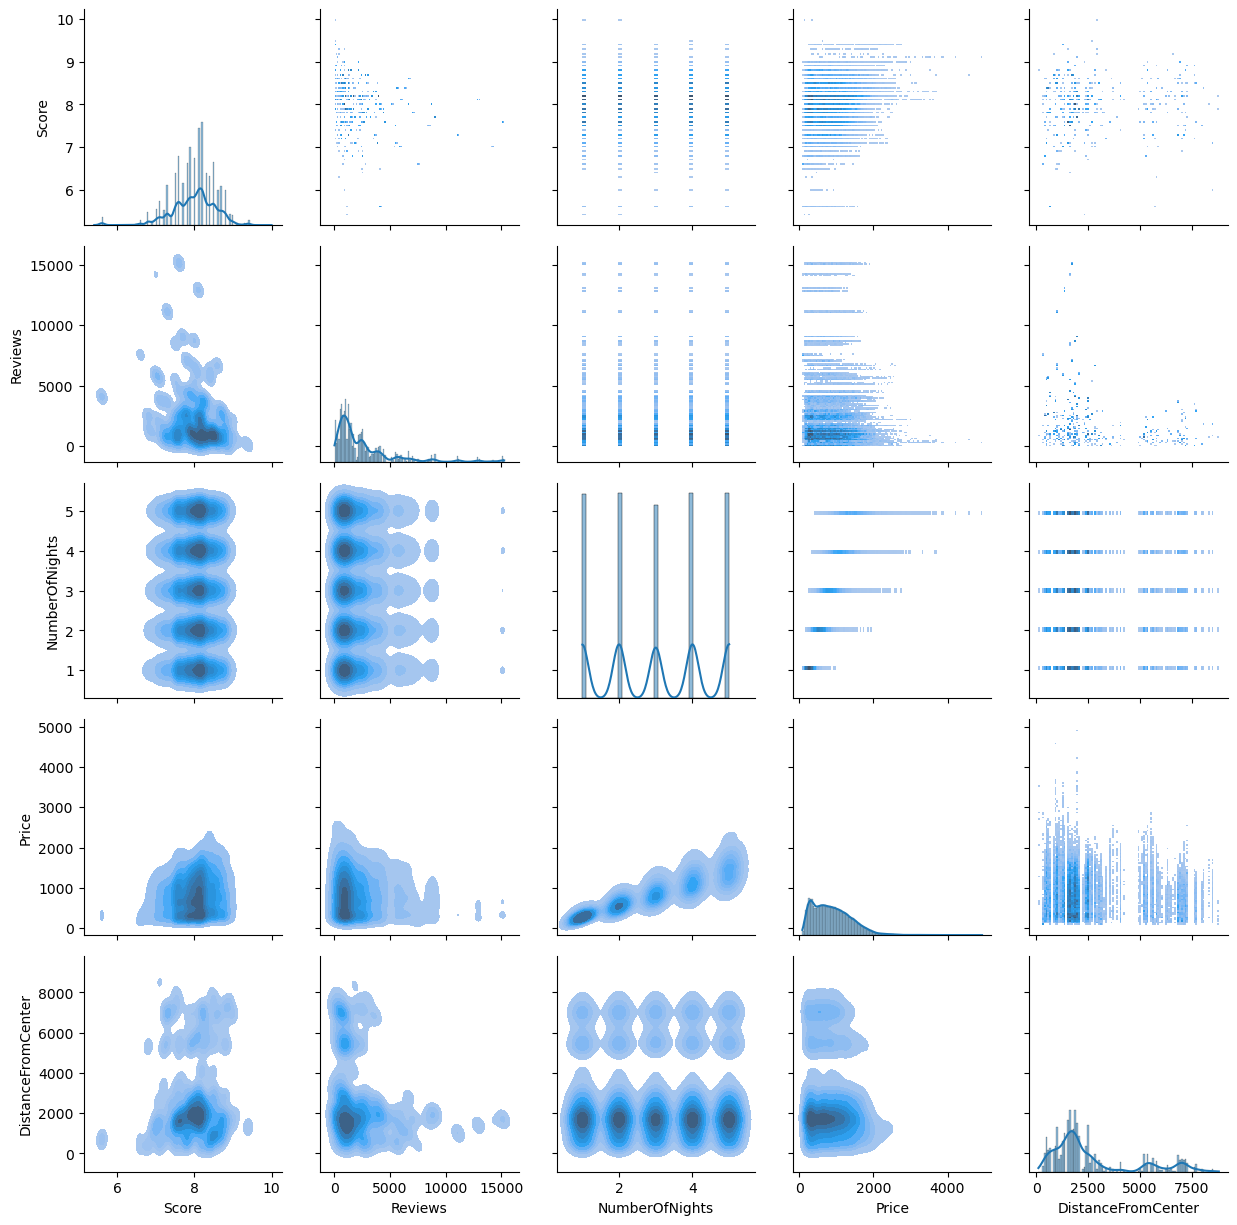

In [44]:
g = sns.PairGrid(df, vars=["Score", "Reviews", "NumberOfNights", "Price", "DistanceFromCenter"])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True);

According to the graphs there is a high density in the distribution between:
* Reviews effects on the score   
* Price effects on score and reviews
* Distance from the center effects on score, reviews and the price

In [23]:
df2.to_csv('newYorkBookingPartB.csv', index=False)